In [6]:
from tensorflow import keras
from utils.classification import train_classifier
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
from utils.images import normalize
from skimage.transform import resize
from random import shuffle
from tensorflow.keras.utils import to_categorical


In [2]:
# Preprocessing training data

img_53 = sitk.ReadImage('./data/g1_53_image.nii.gz', sitk.sitkFloat32)
img_54 = sitk.ReadImage('./data/g1_54_image.nii.gz', sitk.sitkFloat32)
img_55 = sitk.ReadImage('./data/g1_55_image.nii.gz', sitk.sitkFloat32)


img_53 = sitk.GetArrayFromImage(img_53)
img_54 = sitk.GetArrayFromImage(img_54)
img_55 = sitk.GetArrayFromImage(img_55)


In [3]:
imgs = [img_53, img_54]

In [4]:
train_data = []
for img in imgs:
    for idx in range(512):
        slice = resize(img[:,:,idx],(256, 512),anti_aliasing=True)
        train_data.append(slice)

In [5]:
test_data = []
for idx in range(512):
    slice = resize(img_55[:,:,idx],(256, 512),anti_aliasing=True)
    test_data.append(slice)

In [8]:
y_53 = np.zeros(512)
y_53[173:212] = 1
y_53[312:345] = 1


In [9]:
y_54 = np.zeros(512)
y_54[160:203] = 1
y_54[290:326] = 1

In [10]:
y_55 = np.zeros(512)
y_55[181:225] = 1
y_55[292:331] = 1


In [12]:
y_train = np.concatenate((y_53, y_54),axis=0)
y_train = to_categorical(y_train)
y_test = to_categorical(y_55)


In [13]:
train_data = np.array(train_data)

In [14]:
## Get the model 
model = train_classifier(train_data,y_train, 1e-4, 15)

2023-01-01 21:12:46.967301: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 512, 8)       80        
                                                                 
 batch_normalization (BatchN  (None, 256, 512, 8)      32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 256, 512, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 256, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 256, 16)      1168      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 256, 16)     6

/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
128/128 [==============================] - 76s 570ms/step - loss: 0.2156 - accuracy: 0.9209
Epoch 2/15
128/128 [==============================] - 74s 581ms/step - loss: 0.0521 - accuracy: 0.9844
Epoch 3/15
128/128 [==============================] - 73s 567ms/step - loss: 0.0596 - accuracy: 0.9766
Epoch 4/15
128/128 [==============================] - 74s 581ms/step - loss: 0.0432 - accuracy: 0.9834
Epoch 5/15
128/128 [==============================] - 91s 714ms/step - loss: 0.0487 - accuracy: 0.9854
Epoch 6/15
128/128 [==============================] - 89s 695ms/step - loss: 0.0380 - accuracy: 0.9873
Epoch 7/15
128/128 [==============================] - 91s 707ms/step - loss: 0.0345 - accuracy: 0.9873
Epoch 8/15
128/128 [==============================] - 81s 630ms/step - loss: 0.0439 - accuracy: 0.9893
Epoch 9/15
128/128 [==============================] - 68s 527ms/step - loss: 0.0148 - accuracy: 0.9951
Epoch 10/15
128/128 [==============================] - 66s 516ms/step - l

In [15]:
y_pred = model.predict(np.array(test_data))

In [19]:
y_pred[:,1].max()

0.99799037

In [16]:
np.where(y_pred[:,1] == y_pred[:,1].max())

(array([299]),)

In [20]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

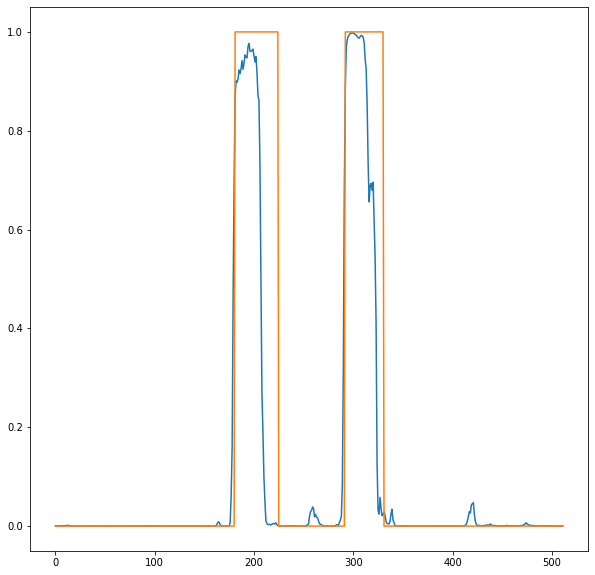

In [21]:
y_pred[:,1]
plt.figure(1, figsize = (10,10))
plt.plot(y_pred[:,1])
plt.plot(y_test[:,1])

In [37]:
y_pred[420,1]

0.045491826

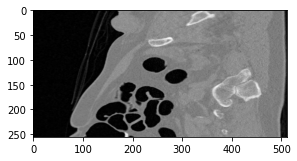

In [41]:
plt.figure(figsize=(10,20))
plt.subplot(121)
plt.imshow(test_data[299], cmap = "Greys_r")